[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/AI-og-helse/blob/main/uke08-etikk-implementering/03_ce_mdr_regulering.ipynb)

# ⚖️ AI og Helse: CE-merking, MDR-regulering og EU's KI-forordning (AI Act)

> **"Regulering handler ikke om å drepe innovasjon; det handler om å kanalisere den i riktig retning"** - [Margrethe Vestager](https://no.wikipedia.org/wiki/Margrethe_Vestager)<br>
> (dansk politiker og EU-kommissær for konkurranse og leder for EU's digitale agenda) 


Velkommen til kanskje den mest kritiske juridiske reisen i AI og helse. Vi skal navigere gjennom det komplekse landskapet av europeisk regulering som bestemmer om en [AI kan redde liv og helse](https://www.cappelendamm.no/_kunstig-intelligens-redder-liv-ishita-barua-9788202788803) - eller forbys helt.

## 🎯 Hva lærer du her?

✅ **Mestre CE-merking:** Når trenger AI-systemer CE-merking for å selges i EU?  
✅ **SaMD klassifisering:** Hvordan klassifiseres Software as Medical Device?  
✅ **MDR compliance:** Navigere Medical Device Regulation for AI  
✅ **Klinisk evaluering:** Planlegge og gjennomføre kliniske studier for AI  
✅ **EU AI Act:** Forstå Europas banebrytende AI-regulering  
✅ **Post-market surveillance:** Overvåke AI-systemer etter lansering  

**💡 Sjokkerende fakta:** I 2021 ble over 500 medisinske AI-produkter tilbakekalt fra det amerikanske markedet på grunn av regulatoriske problemer - mange kunne ha vært unngått med riktig forståelse av kravene fra starten!

> "Medical AI products recalled due to regulatory non-compliance" - FDA Safety Communications, 2021

## 📚 Innhold

1. [CE-merking for AI](#del1) - Når trenger du det?
2. [MDR (Medical Device Regulation)](#del2) - AI som medisinsk utstyr  
3. [EU AI Act](#del3) - Den nye AI-loven
4. [Praktiske øvelser og case](#del4) - Vurder egne AI-systemer

---

### Men først: 🔧 miljøoppsett - kode skal fungere både lokalt, i Codespaces samt Google Colab

In [157]:
import sys
import subprocess
import os

# Sjekk om vi kjører i Google Colab
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print("🚀 Kjører i Google Colab")
    
    # Installer nødvendige pakker som ikke er forhåndsinstallert i Colab
    !pip install seaborn --quiet
    
    # Sjekk om mappen allerede eksisterer
    if not os.path.exists('AI-og-helse'):
        print("📥 Laster ned kursmateriell...")
        try:
            # Prøv å klone repositoryet (da være public)
            !git clone https://github.com/arvidl/AI-og-helse.git
            print("✅ Repository klonet vellykket!")
        except:
            print("⚠️ Kunne ikke klone repository automatisk")
            print("💡 Du kan laste opp filer manuelt eller bruke en annen metode")
    
    # Bytt til riktig mappe hvis den eksisterer
    if os.path.exists('AI-og-helse'):
        os.chdir('AI-og-helse')
        print(f"📁 Byttet til mappe: {os.getcwd()}")
    else:
        print("📂 Arbeider i standard Colab-mappe")
        
else:
    print("💻 Kjører i lokal miljø/Codespaces")

# Standard imports som fungerer overalt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Miljø er konfigurert og klart!")

💻 Kjører i lokal miljø/Codespaces
✅ Miljø er konfigurert og klart!


### 📁 Komplett oversikt over notebook-strukturen:

#### 🎯 **Hovednotebook** 
- Introduksjon og læringsmål  
- Oversikt over alle deler
- Importerer og kjører de andre modulene

#### 1️⃣ **CE-merking for AI** (Del 1) 
**Innhold:**
- `CEMarkingAssessment` - Vurderer CE-merking behov
- `TechnicalDocumentationChecklist` - Dokumentasjonssjekkliste  
- `ConformityDeclaration` - Konformitetserklæring generator
- `AIRiskAssessment` - AI-spesifikk risikovurdering
- Risikoklassifisering visualisering
- Komplett demo og testing

#### 2️⃣ **MDR og SaMD** (Del 2)
**Innhold:**
- `SaMDClassifier` - Software as Medical Device klassifisering
- `ClinicalEvaluationPlanner` - Klinisk evalueringsplan
- `PostMarketSurveillance` - Post-market overvåkning
- SaMD matrise visualisering
- Performance trend analyse

#### 3️⃣ **EU AI Act** (Del 3)
**Innhold:**
- `AIActComplianceChecker` - AI Act compliance vurdering
- Forbudte praksiser sjekk
- Høyrisiko klassifisering
- Transparenskrav vurdering  
- Implementeringstidslinje

#### 4️⃣ **Praktiske Øvelser** (Del 4)
**Innhold:**
- `ComprehensiveRegulatoryAssessment` - Helhetlig vurdering
- Compliance gap analyse
- Regulatory roadmap generator
- Realistiske case studies
- Oppsummering og sjekklister

#### 🎓 Pedagogiske fordeler:

- **✅ Modulært:** Hver del kan læres og brukes separat
- **✅ Praktisk:** Kjørbare verktøy for reelle vurderinger  
- **✅ Interaktivt:** Du kan teste egne AI-systemer
- **✅ Visuelt:** Grafer og dashboards for bedre forståelse
- **✅ Realistisk:** Basert på faktiske regulatoriske krav

Du kan nå arbeide systematisk gjennom AI-regulering med hands-on verktøy for hver del! 🚀

## Del 1: CE-merking for AI

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random

In [159]:
# CE-merking vurdering klasse
class CEMarkingAssessment:
    def __init__(self, product_name):
        self.product_name = product_name
        self.criteria = {
            'medisinsk_formål': False,
            'pasient_påvirkning': False,
            'diagnostisk_funksjon': False,
            'behandlings_anbefaling': False,
            'kommersielt_bruk': False
        }
        
    def vurder_kriterium(self, kriterium, verdi):
        """Setter verdien for et spesifikt kriterium"""
        if kriterium in self.criteria:
            self.criteria[kriterium] = verdi
            print(f"✅ {kriterium}: {'JA' if verdi else 'NEI'}")
        else:
            print(f"❌ Ukjent kriterium: {kriterium}")
    
    def trenger_ce_merking(self):
        """Vurderer om produktet trenger CE-merking"""
        score = sum(self.criteria.values())
        
        print(f"\n🔍 Vurdering av {self.product_name}:")
        print(f"Score: {score}/5 kriterier oppfylt")
        
        if score >= 3 and self.criteria['medisinsk_formål']:
            return "🚨 TRENGER CE-MERKING"
        elif score >= 2:
            return "⚠️ MULIG CE-MERKING - Trenger nærmere vurdering"
        else:
            return "✅ TRENGER SANNSYNLIGVIS IKKE CE-MERKING"

In [160]:
# Visualisering av risikoklassifisering
def plot_risk_classification():
    # Data for visualisering
    classes = ['Klasse I', 'Klasse IIa', 'Klasse IIb', 'Klasse III']
    risk_levels = [1, 3, 6, 9]
    colors = ['green', 'yellow', 'orange', 'red']
    
    # Eksempler på AI-systemer
    examples = [
        'Administrativ AI\nKalkulatorer',
        'Beslutningsstøtte\nIkke-kritisk overvåkning',
        'Diagnostisk AI\nBehandlingsplanlegging',
        'Kritisk diagnostikk\nAutomatisert behandling'
    ]
    
    plt.figure(figsize=(12, 6))
    
    # Lag søylediagram
    bars = plt.bar(classes, risk_levels, color=colors, alpha=0.7, edgecolor='black')
    
    # Legg til eksempler som tekst
    for i, (bar, example) in enumerate(zip(bars, examples)):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                example, ha='center', va='bottom', fontsize=9, 
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    plt.title('MDR Risikoklassifisering for AI-systemer', fontsize=14, fontweight='bold')
    plt.ylabel('Risikonivå', fontsize=12)
    plt.xlabel('MDR Klasse', fontsize=12)
    plt.ylim(0, 12)
    
    # Legg til risikonivå-etiketter
    plt.text(0, 10, 'LAV\nRISIKO', ha='center', fontsize=10, color='green', fontweight='bold')
    plt.text(1, 10, 'LAV-MIDDELS\nRISIKO', ha='center', fontsize=10, color='orange', fontweight='bold')
    plt.text(2, 10, 'MIDDELS-HØY\nRISIKO', ha='center', fontsize=10, color='orangered', fontweight='bold')
    plt.text(3, 10, 'HØY\nRISIKO', ha='center', fontsize=10, color='red', fontweight='bold')
    
    plt.tight_layout()
    plt.grid(axis='y', alpha=0.3)
    plt.show()

In [161]:
# Template for teknisk dokumentasjon sjekkliste
class TechnicalDocumentationChecklist:
    def __init__(self):
        self.sections = {
            'Teknisk fil': {
                'AI-arkitektur beskrivelse': False,
                'Algoritme detaljer': False,
                'Treningsdata dokumentasjon': False,
                'Valideringsresultater': False,
                'Ytelsesmetrikker': False
            },
            'Risikoanalyse': {
                'ISO 14971 analyse': False,
                'AI-spesifikke risikoer': False,
                'Bias vurdering': False,
                'Robusthetstesk': False,
                'Sikkerhetstiltak': False
            },
            'Klinisk evaluering': {
                'Klinisk evalueringsplan': False,
                'Kliniske data': False,
                'Litteraturgjennomgang': False,
                'Ytelsesvalidering': False,
                'Post-market data': False
            },
            'Brukerdokumentasjon': {
                'Bruksanvisning': False,
                'Installasjonsguide': False,
                'Troubleshooting': False,
                'Vedlikehold prosedyrer': False,
                'Opplæring materialer': False
            }
        }
    
    def update_item(self, section, item, completed=True):
        """Oppdaterer status for et dokumentasjonspunkt"""
        if section in self.sections and item in self.sections[section]:
            self.sections[section][item] = completed
            status = '✅' if completed else '❌'
            print(f"{status} {section} -> {item}: {'Fullført' if completed else 'Mangler'}")
        else:
            print(f"❌ Finner ikke {section} -> {item}")
    
    def get_completion_status(self):
        """Returnerer fullføringsstatus for alle seksjoner"""
        results = {}
        
        for section, items in self.sections.items():
            completed = sum(items.values())
            total = len(items)
            percentage = (completed / total) * 100
            results[section] = {
                'completed': completed,
                'total': total,
                'percentage': percentage
            }
        
        return results
    
    def plot_completion_status(self):
        """Visualiserer fullføringsstatus"""
        status = self.get_completion_status()
        
        sections = list(status.keys())
        percentages = [status[section]['percentage'] for section in sections]
        
        plt.figure(figsize=(10, 6))
        
        # Lag farger basert på fullføring
        colors = ['red' if p < 50 else 'orange' if p < 80 else 'green' for p in percentages]
        
        bars = plt.barh(sections, percentages, color=colors, alpha=0.7)
        
        # Legg til prosentandeler som tekst
        for i, (bar, percentage) in enumerate(zip(bars, percentages)):
            plt.text(percentage + 1, bar.get_y() + bar.get_height()/2,
                    f'{percentage:.0f}%', va='center', fontweight='bold')
        
        plt.title('Teknisk Dokumentasjon - Fullføringsstatus', fontsize=14, fontweight='bold')
        plt.xlabel('Fullføring (%)', fontsize=12)
        plt.xlim(0, 110)
        
        # Legg til vertikal linje ved 100%
        plt.axvline(x=100, color='black', linestyle='--', alpha=0.5)
        
        plt.tight_layout()
        plt.show()
    
    def print_detailed_status(self):
        """Skriver ut detaljert status for alle seksjoner"""
        print("📋 DETALJERT DOKUMENTASJONSSTATUS")
        print("="*50)
        
        status = self.get_completion_status()
        
        for section, items in self.sections.items():
            section_status = status[section]
            print(f"\n📁 {section}:")
            print(f"   Fullføring: {section_status['completed']}/{section_status['total']} ({section_status['percentage']:.0f}%)")
            print("   Elementer:")
            
            for item, completed in items.items():
                status_icon = "✅" if completed else "❌"
                print(f"      {status_icon} {item}")




In [162]:
# Konformitetserklæring generator
class ConformityDeclaration:
    def __init__(self, product_name, manufacturer_name, ce_class):
        self.product_name = product_name
        self.manufacturer_name = manufacturer_name
        self.ce_class = ce_class
        self.declaration_date = datetime.now()
        
    def generate_declaration(self):
        """Genererer konformitetserklæring template"""
        
        # Relevant direktiver og standarder basert på klasse
        directives_standards = {
            'I': {
                'directives': ['MDR 2017/745'],
                'standards': ['ISO 14155', 'ISO 13485', 'IEC 62304']
            },
            'IIa': {
                'directives': ['MDR 2017/745'],
                'standards': ['ISO 14155', 'ISO 13485', 'IEC 62304', 'ISO 14971']
            },
            'IIb': {
                'directives': ['MDR 2017/745'],
                'standards': ['ISO 14155', 'ISO 13485', 'IEC 62304', 'ISO 14971', 'IEC 62366-1']
            },
            'III': {
                'directives': ['MDR 2017/745'],
                'standards': ['ISO 14155', 'ISO 13485', 'IEC 62304', 'ISO 14971', 'IEC 62366-1', 'ISO 10993']
            }
        }
        
        applicable = directives_standards.get(self.ce_class, directives_standards['I'])
        
        declaration = f"""
╔══════════════════════════════════════════════════════════════╗
║                    EU KONFORMITETSERKLÆRING                  ║
║                    (EU DECLARATION OF CONFORMITY)           ║
╚══════════════════════════════════════════════════════════════╝

📅 Dato: {self.declaration_date.strftime('%d.%m.%Y')}
🏭 Produsent: {self.manufacturer_name}
🤖 Produkt: {self.product_name}
📊 MDR Klasse: {self.ce_class}

🔰 KONFORMITETSERKLÆRING:

Vi, {self.manufacturer_name}, erklærer under eneansvar at produktet:

    "{self.product_name}"

er i samsvar med følgende direktiver og forordninger:

📋 GJELDENDE DIREKTIVER:
"""
        
        for directive in applicable['directives']:
            declaration += f"   • {directive}\n"
        
        declaration += f"""
📋 ANVENDTE HARMONISERTE STANDARDER:
"""
        
        for standard in applicable['standards']:
            declaration += f"   • {standard}\n"
        
        declaration += f"""

✅ SAMSVARSVURDERING:
   • Teknisk dokumentasjon er utarbeidet
   • Risikoanalyse er gjennomført (ISO 14971)
   • Klinisk evaluering er utført
   • Post-market surveillance system etablert

📝 TEKNISK FIL:
   Teknisk dokumentasjon oppbevares hos produsent i minimum 10 år
   etter at produktet tas ut av markedet.

🔍 BENYTTET ORGAN (hvis aktuelt):
   [Skal fylles ut for klasse IIa, IIb, III]

⚖️ JURIDISK ANSVAR:
   Denne erklæringen avgis under produsentens eneansvar.

───────────────────────────────────────────────────────────────

🖊️  Underskrift: _______________________
👤 Navn: [Autorisert representant]
📍 Sted: [Sted]
📅 Dato: {self.declaration_date.strftime('%d.%m.%Y')}

───────────────────────────────────────────────────────────────
        """
        
        return declaration
    
    def print_declaration(self):
        """Skriver ut konformitetserklæringen"""
        declaration = self.generate_declaration()
        print(declaration)
        
        return declaration


In [163]:
# AI-spesifikke risikovurderingsverktøy
class AIRiskAssessment:
    def __init__(self, ai_system_name):
        self.ai_system_name = ai_system_name
        self.risk_categories = {
            'Data Quality': {
                'risks': [
                    'Bias i treningsdata',
                    'Utilstrekkelig datarepresentativitet', 
                    'Dårlig datakvalitet',
                    'Manglende datavalidering'
                ],
                'severity_levels': ['Low', 'Medium', 'High', 'Critical']
            },
            'Algorithm Performance': {
                'risks': [
                    'Overfitting til treningsdata',
                    'Model decay over tid',
                    'Uventede edge cases',
                    'Manglende robusthet'
                ],
                'severity_levels': ['Low', 'Medium', 'High', 'Critical']
            },
            'Human Factors': {
                'risks': [
                    'Over-reliance på AI-anbefalinger',
                    'Automation bias',
                    'Manglende AI-forståelse hos brukere',
                    'Utilstrekkelig opplæring'
                ],
                'severity_levels': ['Low', 'Medium', 'High', 'Critical']
            },
            'Technical Security': {
                'risks': [
                    'Adversarial attacks',
                    'Data poisoning',
                    'Model stealing',
                    'Privacy leakage'
                ],
                'severity_levels': ['Low', 'Medium', 'High', 'Critical']
            }
        }
        
        self.risk_matrix = {}
    
    def assess_risk(self, category, risk, probability, severity):
        """Vurderer en spesifikk risiko"""
        if category not in self.risk_categories:
            print(f"❌ Ukjent risikokategori: {category}")
            return
        
        # Beregn risikoscore (1-16 skala)
        prob_score = {'Low': 1, 'Medium': 2, 'High': 3, 'Critical': 4}[probability]
        sev_score = {'Low': 1, 'Medium': 2, 'High': 3, 'Critical': 4}[severity]
        risk_score = prob_score * sev_score
        
        # Klassifiser risiko
        if risk_score <= 2:
            risk_level = "🟢 Acceptabel"
        elif risk_score <= 6:
            risk_level = "🟡 Moderat"
        elif risk_score <= 12:
            risk_level = "🟠 Høy"
        else:
            risk_level = "🔴 Kritisk"
        
        # Lagre vurdering
        if category not in self.risk_matrix:
            self.risk_matrix[category] = []
        
        self.risk_matrix[category].append({
            'risk': risk,
            'probability': probability,
            'severity': severity,
            'score': risk_score,
            'level': risk_level
        })
        
        print(f"📊 {category} - {risk}")
        print(f"   Sannsynlighet: {probability}, Alvorlighet: {severity}")
        print(f"   Risikoscore: {risk_score}/16 - {risk_level}")
        
        return risk_score
    
    def generate_risk_report(self):
        """Genererer risikrapport"""
        print(f"\n🔍 RISIKOANALYSERAPPORT - {self.ai_system_name}")
        print("="*60)
        
        total_risks = 0
        critical_risks = 0
        high_risks = 0
        
        for category, risks in self.risk_matrix.items():
            print(f"\n📋 {category.upper()}:")
            print("-" * 40)
            
            for risk_item in risks:
                total_risks += 1
                if "Kritisk" in risk_item['level']:
                    critical_risks += 1
                elif "Høy" in risk_item['level']:
                    high_risks += 1
                
                print(f"   • {risk_item['risk']}")
                print(f"     {risk_item['level']} (Score: {risk_item['score']}/16)")
        
        print(f"\n📊 SAMMENDRAG:")
        print(f"   • Total antall risikoer vurdert: {total_risks}")
        print(f"   • Kritiske risikoer: {critical_risks}")
        print(f"   • Høye risikoer: {high_risks}")
        
        if critical_risks > 0:
            print(f"\n⚠️  ANBEFALINGER:")
            print(f"   🔴 {critical_risks} kritiske risikoer krever umiddelbar handling")
            print(f"   📋 Utvikle risikoreduserende tiltak før markedsføring")
        
        return self.risk_matrix


In [164]:
# ====================================================================
# DEMONSTRASJON OG TESTING
# ====================================================================

print("🏥 CE-MERKING FOR AI - DEMONSTRASJON")
print("="*50)

🏥 CE-MERKING FOR AI - DEMONSTRASJON


In [165]:
# Test CE-merking vurdering
print("\n1️⃣ CE-MERKING VURDERING:")
print("-" * 25)

ai_røntgen = CEMarkingAssessment("AI Røntgen-diagnostikk")
ai_røntgen.vurder_kriterium('medisinsk_formål', True)
ai_røntgen.vurder_kriterium('pasient_påvirkning', True)
ai_røntgen.vurder_kriterium('diagnostisk_funksjon', True)
ai_røntgen.vurder_kriterium('kommersielt_bruk', True)

resultat = ai_røntgen.trenger_ce_merking()
print(f"\n{resultat}")


1️⃣ CE-MERKING VURDERING:
-------------------------
✅ medisinsk_formål: JA
✅ pasient_påvirkning: JA
✅ diagnostisk_funksjon: JA
✅ kommersielt_bruk: JA

🔍 Vurdering av AI Røntgen-diagnostikk:
Score: 4/5 kriterier oppfylt

🚨 TRENGER CE-MERKING


In [166]:
# Test dokumentasjonssjekkliste
print("\n\n2️⃣ DOKUMENTASJONSSJEKKLISTE:")
print("-" * 30)

doc_check = TechnicalDocumentationChecklist()



2️⃣ DOKUMENTASJONSSJEKKLISTE:
------------------------------


In [167]:
# Simuler noe fremgang
doc_check.update_item('Teknisk fil', 'AI-arkitektur beskrivelse', True)
doc_check.update_item('Teknisk fil', 'Algoritme detaljer', True)
doc_check.update_item('Risikoanalyse', 'ISO 14971 analyse', True)
doc_check.update_item('Brukerdokumentasjon', 'Bruksanvisning', True)

print("\n📋 Detaljert status:")
doc_check.print_detailed_status()


✅ Teknisk fil -> AI-arkitektur beskrivelse: Fullført
✅ Teknisk fil -> Algoritme detaljer: Fullført
✅ Risikoanalyse -> ISO 14971 analyse: Fullført
✅ Brukerdokumentasjon -> Bruksanvisning: Fullført

📋 Detaljert status:
📋 DETALJERT DOKUMENTASJONSSTATUS

📁 Teknisk fil:
   Fullføring: 2/5 (40%)
   Elementer:
      ✅ AI-arkitektur beskrivelse
      ✅ Algoritme detaljer
      ❌ Treningsdata dokumentasjon
      ❌ Valideringsresultater
      ❌ Ytelsesmetrikker

📁 Risikoanalyse:
   Fullføring: 1/5 (20%)
   Elementer:
      ✅ ISO 14971 analyse
      ❌ AI-spesifikke risikoer
      ❌ Bias vurdering
      ❌ Robusthetstesk
      ❌ Sikkerhetstiltak

📁 Klinisk evaluering:
   Fullføring: 0/5 (0%)
   Elementer:
      ❌ Klinisk evalueringsplan
      ❌ Kliniske data
      ❌ Litteraturgjennomgang
      ❌ Ytelsesvalidering
      ❌ Post-market data

📁 Brukerdokumentasjon:
   Fullføring: 1/5 (20%)
   Elementer:
      ✅ Bruksanvisning
      ❌ Installasjonsguide
      ❌ Troubleshooting
      ❌ Vedlikehold prosed


📊 Visualisering av dokumentasjonsstatus:


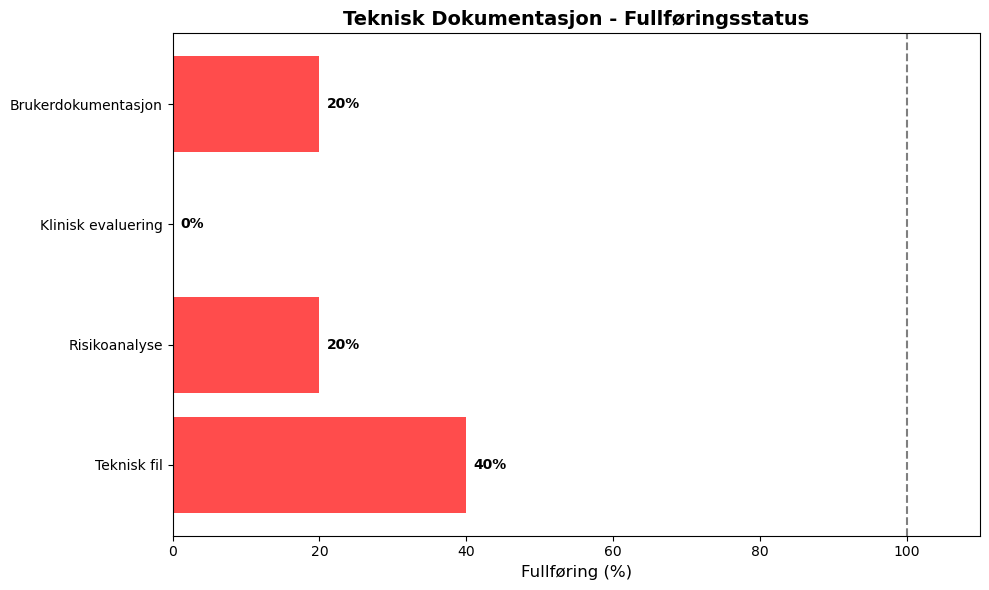

In [168]:
print("\n📊 Visualisering av dokumentasjonsstatus:")
doc_check.plot_completion_status()

In [169]:
# Test risikovurdering
print("\n\n3️⃣ AI RISIKOVURDERING:")
print("-" * 22)

risk_assessor = AIRiskAssessment("AI Røntgendiagnostikk")



3️⃣ AI RISIKOVURDERING:
----------------------


In [170]:
# Vurder noen risikoer
risk_assessor.assess_risk('Data Quality', 'Bias i treningsdata', 'Medium', 'High')
risk_assessor.assess_risk('Algorithm Performance', 'Model decay over tid', 'High', 'Medium')
risk_assessor.assess_risk('Human Factors', 'Over-reliance på AI-anbefalinger', 'Medium', 'High')
risk_assessor.assess_risk('Technical Security', 'Adversarial attacks', 'Low', 'Critical')

📊 Data Quality - Bias i treningsdata
   Sannsynlighet: Medium, Alvorlighet: High
   Risikoscore: 6/16 - 🟡 Moderat
📊 Algorithm Performance - Model decay over tid
   Sannsynlighet: High, Alvorlighet: Medium
   Risikoscore: 6/16 - 🟡 Moderat
📊 Human Factors - Over-reliance på AI-anbefalinger
   Sannsynlighet: Medium, Alvorlighet: High
   Risikoscore: 6/16 - 🟡 Moderat
📊 Technical Security - Adversarial attacks
   Sannsynlighet: Low, Alvorlighet: Critical
   Risikoscore: 4/16 - 🟡 Moderat


4

In [171]:
# Generer rapport
risk_assessor.generate_risk_report()


🔍 RISIKOANALYSERAPPORT - AI Røntgendiagnostikk

📋 DATA QUALITY:
----------------------------------------
   • Bias i treningsdata
     🟡 Moderat (Score: 6/16)

📋 ALGORITHM PERFORMANCE:
----------------------------------------
   • Model decay over tid
     🟡 Moderat (Score: 6/16)

📋 HUMAN FACTORS:
----------------------------------------
   • Over-reliance på AI-anbefalinger
     🟡 Moderat (Score: 6/16)

📋 TECHNICAL SECURITY:
----------------------------------------
   • Adversarial attacks
     🟡 Moderat (Score: 4/16)

📊 SAMMENDRAG:
   • Total antall risikoer vurdert: 4
   • Kritiske risikoer: 0
   • Høye risikoer: 0


{'Data Quality': [{'risk': 'Bias i treningsdata',
   'probability': 'Medium',
   'severity': 'High',
   'score': 6,
   'level': '🟡 Moderat'}],
 'Algorithm Performance': [{'risk': 'Model decay over tid',
   'probability': 'High',
   'severity': 'Medium',
   'score': 6,
   'level': '🟡 Moderat'}],
 'Human Factors': [{'risk': 'Over-reliance på AI-anbefalinger',
   'probability': 'Medium',
   'severity': 'High',
   'score': 6,
   'level': '🟡 Moderat'}],
 'Technical Security': [{'risk': 'Adversarial attacks',
   'probability': 'Low',
   'severity': 'Critical',
   'score': 4,
   'level': '🟡 Moderat'}]}

In [172]:
# Test konformitetserklæring
print("\n\n4️⃣ KONFORMITETSERKLÆRING:")
print("-" * 26)

conformity = ConformityDeclaration(
    "AI Røntgendiagnostikk v2.1", 
    "MedTech AI Solutions AS", 
    "IIb"
)
conformity.print_declaration()



4️⃣ KONFORMITETSERKLÆRING:
--------------------------

╔══════════════════════════════════════════════════════════════╗
║                    EU KONFORMITETSERKLÆRING                  ║
║                    (EU DECLARATION OF CONFORMITY)           ║
╚══════════════════════════════════════════════════════════════╝

📅 Dato: 13.09.2025
🏭 Produsent: MedTech AI Solutions AS
🤖 Produkt: AI Røntgendiagnostikk v2.1
📊 MDR Klasse: IIb

🔰 KONFORMITETSERKLÆRING:

Vi, MedTech AI Solutions AS, erklærer under eneansvar at produktet:

    "AI Røntgendiagnostikk v2.1"

er i samsvar med følgende direktiver og forordninger:

📋 GJELDENDE DIREKTIVER:
   • MDR 2017/745

📋 ANVENDTE HARMONISERTE STANDARDER:
   • ISO 14155
   • ISO 13485
   • IEC 62304
   • ISO 14971
   • IEC 62366-1


✅ SAMSVARSVURDERING:
   • Teknisk dokumentasjon er utarbeidet
   • Risikoanalyse er gjennomført (ISO 14971)
   • Klinisk evaluering er utført
   • Post-market surveillance system etablert

📝 TEKNISK FIL:
   Teknisk dokumentasjon

'\n╔══════════════════════════════════════════════════════════════╗\n║                    EU KONFORMITETSERKLÆRING                  ║\n║                    (EU DECLARATION OF CONFORMITY)           ║\n╚══════════════════════════════════════════════════════════════╝\n\n📅 Dato: 13.09.2025\n🏭 Produsent: MedTech AI Solutions AS\n🤖 Produkt: AI Røntgendiagnostikk v2.1\n📊 MDR Klasse: IIb\n\n🔰 KONFORMITETSERKLÆRING:\n\nVi, MedTech AI Solutions AS, erklærer under eneansvar at produktet:\n\n    "AI Røntgendiagnostikk v2.1"\n\ner i samsvar med følgende direktiver og forordninger:\n\n📋 GJELDENDE DIREKTIVER:\n   • MDR 2017/745\n\n📋 ANVENDTE HARMONISERTE STANDARDER:\n   • ISO 14155\n   • ISO 13485\n   • IEC 62304\n   • ISO 14971\n   • IEC 62366-1\n\n\n✅ SAMSVARSVURDERING:\n   • Teknisk dokumentasjon er utarbeidet\n   • Risikoanalyse er gjennomført (ISO 14971)\n   • Klinisk evaluering er utført\n   • Post-market surveillance system etablert\n\n📝 TEKNISK FIL:\n   Teknisk dokumentasjon oppbevares hos pr



5️⃣ MDR RISIKOKLASSIFISERING:
----------------------------


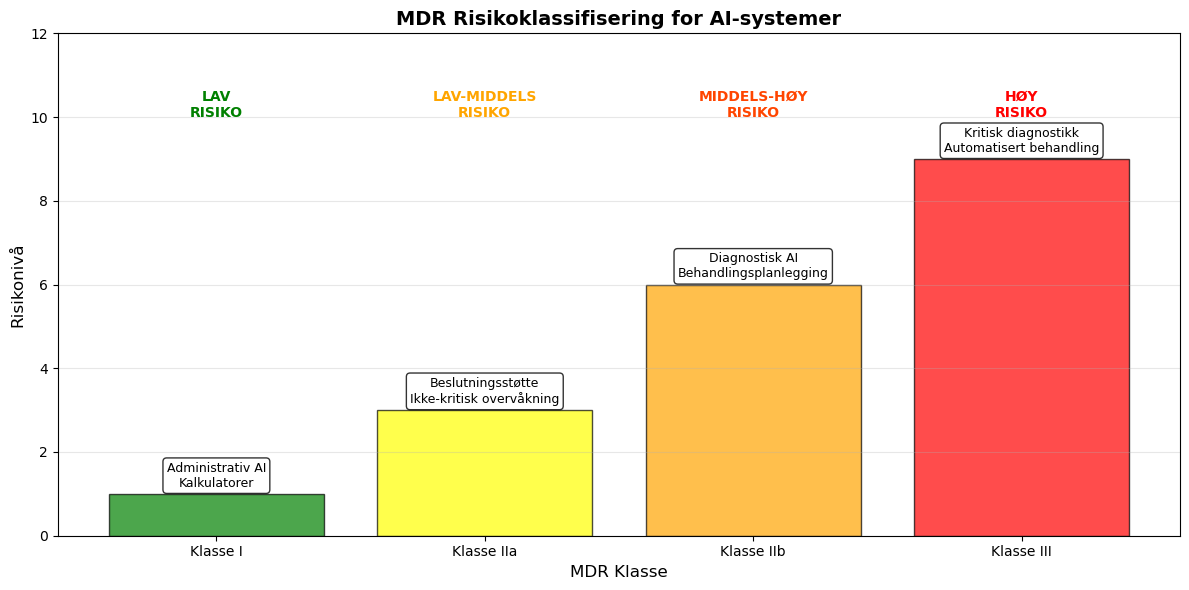

In [173]:
# Vis risikoklassifisering
print("\n\n5️⃣ MDR RISIKOKLASSIFISERING:")
print("-" * 28)
plot_risk_classification()

In [174]:
print("\n✅ CE-merking demonstrasjon fullført!")
print("💡 Bruk verktøyene over til å vurdere dine egne AI-systemer.")


✅ CE-merking demonstrasjon fullført!
💡 Bruk verktøyene over til å vurdere dine egne AI-systemer.


## Del 2: MDR (Medical Device Regulation) og SaMD Klassifisering

In [175]:
# SaMD klassifiseringsmatrise
def create_samd_matrix():
    """
    Lager SaMD klassifiseringsmatrise som definert av IMDRF
    """
    # Definerer data for SaMD matrisen
    healthcare_situations = ['Critical', 'Serious', 'Non-serious']
    healthcare_decisions = ['Treat', 'Diagnose', 'Drive', 'Inform']
    
    # SaMD klassifisering (basert på risiko)
    matrix_data = [
        ['IV', 'III', 'II'],      # Treat
        ['III', 'II', 'I'],       # Diagnose  
        ['II', 'I', 'I'],         # Drive
        ['I', 'I', 'I']           # Inform
    ]
    
    # Lag DataFrame
    samd_df = pd.DataFrame(matrix_data, 
                          index=healthcare_decisions, 
                          columns=healthcare_situations)
    
    return samd_df

In [176]:
def plot_samd_matrix():
    """
    Visualiserer SaMD klassifiseringsmatrise
    """
    samd_df = create_samd_matrix()
    
    # Konverter til numerisk for heatmap
    numeric_matrix = samd_df.replace({'I': 1, 'II': 2, 'III': 3, 'IV': 4})
    
    plt.figure(figsize=(10, 6))
    
    # Lag heatmap
    sns.heatmap(numeric_matrix, annot=samd_df.values, fmt='', 
                cmap='Reds', cbar_kws={'label': 'Risk Level'},
                xticklabels=samd_df.columns,
                yticklabels=samd_df.index)
    
    plt.title('SaMD Klassifiseringsmatrise\n(Software as Medical Device)', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Healthcare Situation (Kritikalitet)', fontsize=12)
    plt.ylabel('Healthcare Decision (Beslutningstype)', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    return samd_df

In [177]:
# Praktisk SaMD klassifisering tool
class SaMDClassifier:
    def __init__(self):
        self.matrix = create_samd_matrix()
        
        # Eksempler på healthcare situations
        self.situation_examples = {
            'Critical': [
                'Akutt hjerneslag',
                'Hjertestans',
                'Sepsis',
                'Alvorlig traumer'
            ],
            'Serious': [
                'Kreftdiagnostikk',
                'Hjerte-kar sykdom',
                'Diabetes komplikasjoner',
                'Alvorlig infeksjon'
            ],
            'Non-serious': [
                'Rutine helsesjekk',
                'Forebyggende screening',
                'Livsstilsrådgivning',
                'Wellness overvåkning'
            ]
        }
        
        # Eksempler på healthcare decisions
        self.decision_examples = {
            'Treat': 'AI som automatisk justerer medisindoser eller styrer behandlingsutstyr',
            'Diagnose': 'AI som stiller diagnoser eller klassifiserer sykdomstilstander',
            'Drive': 'AI som leverer informasjon for kliniske beslutninger',
            'Inform': 'AI som kun gir informasjon uten å påvirke behandling'
        }
    
    def classify_ai_system(self, decision_type, situation_type):
        """
        Klassifiserer et AI-system basert på SaMD matrisen
        """
        try:
            classification = self.matrix.loc[decision_type, situation_type]
            
            print(f"🤖 AI System Klassifisering:")
            print(f"   Decision Type: {decision_type}")
            print(f"   Situation: {situation_type}")
            print(f"   📊 SaMD Klasse: {classification}")
            
            # Gi tilleggsinformasjon om klassen
            risk_info = {
                'I': '🟢 Lav risiko - Egenerklæring',
                'II': '🟡 Lav-middels risiko - Benyttet organ',
                'III': '🟠 Middels-høy risiko - Benyttet organ',
                'IV': '🔴 Høy risiko - Benyttet organ + ekstra krav'
            }
            
            print(f"   {risk_info[classification]}")
            
            return classification
            
        except KeyError:
            print(f"❌ Ugyldig kombinasjon: {decision_type} + {situation_type}")
            return None
    
    def show_examples(self):
        """
        Viser eksempler på forskjellige kategorier
        """
        print("📚 Healthcare Decision Eksempler:")
        for decision, example in self.decision_examples.items():
            print(f"   • {decision}: {example}")
        
        print("\n🏥 Healthcare Situation Eksempler:")
        for situation, examples in self.situation_examples.items():
            print(f"   • {situation}: {', '.join(examples)}")

In [178]:
# Klinisk evaluerings-planlegger
class ClinicalEvaluationPlanner:
    def __init__(self, ai_system_name, samd_class):
        self.ai_system_name = ai_system_name
        self.samd_class = samd_class
        self.evaluation_requirements = self._get_requirements_by_class()
        
    def _get_requirements_by_class(self):
        """Returnerer krav basert på SaMD klasse"""
        requirements = {
            'I': {
                'clinical_study_required': False,
                'literature_review': True,
                'performance_testing': 'Basic',
                'pmcf_required': False,
                'bias_testing': 'Minimal',
                'robustness_testing': 'Basic'
            },
            'II': {
                'clinical_study_required': True,
                'literature_review': True,
                'performance_testing': 'Standard',
                'pmcf_required': True,
                'bias_testing': 'Standard',
                'robustness_testing': 'Standard'
            },
            'III': {
                'clinical_study_required': True,
                'literature_review': True,
                'performance_testing': 'Extensive',
                'pmcf_required': True,
                'bias_testing': 'Comprehensive',
                'robustness_testing': 'Extensive'
            },
            'IV': {
                'clinical_study_required': True,
                'literature_review': True,
                'performance_testing': 'Extensive',
                'pmcf_required': True,
                'bias_testing': 'Comprehensive',
                'robustness_testing': 'Extensive',
                'additional_oversight': True
            }
        }
        
        return requirements.get(self.samd_class, requirements['I'])
    
    def generate_evaluation_plan(self):
        """Genererer klinisk evalueringsplan"""
        plan = {
            'system_info': {
                'name': self.ai_system_name,
                'samd_class': self.samd_class
            },
            'required_activities': [],
            'timeline_months': 0,
            'estimated_cost': 0
        }
        
        # Legg til nødvendige aktiviteter
        if self.evaluation_requirements['literature_review']:
            plan['required_activities'].append({
                'activity': 'Litteraturgjennomgang',
                'duration_months': 2,
                'cost_nok': 50000
            })
        
        if self.evaluation_requirements['clinical_study_required']:
            study_duration = 6 if self.samd_class in ['II'] else 12
            study_cost = 200000 if self.samd_class == 'II' else 500000
            
            plan['required_activities'].append({
                'activity': 'Klinisk studie',
                'duration_months': study_duration,
                'cost_nok': study_cost
            })
        
        # Performance testing
        perf_cost = {'Basic': 25000, 'Standard': 75000, 'Extensive': 150000}
        plan['required_activities'].append({
            'activity': f'Performance Testing ({self.evaluation_requirements["performance_testing"]})',
            'duration_months': 3,
            'cost_nok': perf_cost[self.evaluation_requirements['performance_testing']]
        })
        
        # PMCF
        if self.evaluation_requirements['pmcf_required']:
            plan['required_activities'].append({
                'activity': 'Post-Market Clinical Follow-up',
                'duration_months': 24,  # Kontinuerlig
                'cost_nok': 100000
            })
        
        # Beregn totaler
        plan['timeline_months'] = max([a['duration_months'] for a in plan['required_activities']])
        plan['estimated_cost'] = sum([a['cost_nok'] for a in plan['required_activities']])
        
        return plan
    
    def print_evaluation_plan(self):
        """Skriver ut evalueringsplanen"""
        plan = self.generate_evaluation_plan()
        
        print(f"📋 KLINISK EVALUERINGSPLAN")
        print(f"{'='*50}")
        print(f"🤖 AI System: {plan['system_info']['name']}")
        print(f"📊 SaMD Klasse: {plan['system_info']['samd_class']}")
        print(f"⏱️  Estimert tidslinje: {plan['timeline_months']} måneder")
        print(f"💰 Estimert kostnad: {plan['estimated_cost']:,} NOK")
        
        print(f"\n📝 NØDVENDIGE AKTIVITETER:")
        for i, activity in enumerate(plan['required_activities'], 1):
            print(f"   {i}. {activity['activity']}")
            print(f"      ⏱️  Varighet: {activity['duration_months']} måneder")
            print(f"      💰 Kostnad: {activity['cost_nok']:,} NOK")
            print()
        
        return plan

In [179]:
# Post-market surveillance dashboard simulator
class PostMarketSurveillance:
    """Post-market surveillance for AI-systemer i henhold til MDR"""
    
    def __init__(self, ai_system_name):
        self.ai_system_name = ai_system_name
        self.start_date = datetime.now() - timedelta(days=365)
        self.monitoring_data = self._generate_monitoring_data()
    
    def _generate_monitoring_data(self):
        """Generer simulerte overvåkingsdata"""
        data = []
        base_accuracy = 0.95
        current_date = self.start_date
        
        for week in range(52):  # 52 uker
            # Simuler gradual model decay
            accuracy_decay = week * 0.001  # 0.1% per uke
            noise = random.uniform(-0.02, 0.02)
            current_accuracy = base_accuracy - accuracy_decay + noise
            
            # Simuler andre metriker
            data.append({
                'week': week + 1,
                'date': current_date + timedelta(weeks=week),
                'accuracy': max(0.7, min(0.99, current_accuracy)),
                'sensitivity': max(0.75, current_accuracy + random.uniform(-0.05, 0.03)),
                'specificity': max(0.80, current_accuracy + random.uniform(-0.03, 0.05)),
                'user_satisfaction': max(3.0, min(5.0, 4.5 + random.uniform(-0.5, 0.3))),
                'adverse_events': np.random.poisson(2),  # FIX: Bruk np.random.poisson
                'usage_volume': random.randint(800, 1200)
            })
        
        return pd.DataFrame(data)
    
    def print_surveillance_report(self):
        """Print overvåkingsrapport"""
        print(f"📊 POST-MARKET SURVEILLANCE RAPPORT")
        print(f"🤖 AI-system: {self.ai_system_name}")
        print(f"📅 Overvåkingsperiode: {self.start_date.strftime('%Y-%m-%d')} til {datetime.now().strftime('%Y-%m-%d')}")
        print("="*60)
        
        # Beregn nøkkelstatistikk
        latest_data = self.monitoring_data.iloc[-1]
        avg_accuracy = self.monitoring_data['accuracy'].mean()
        total_adverse_events = self.monitoring_data['adverse_events'].sum()
        avg_usage = self.monitoring_data['usage_volume'].mean()
        
        print(f"📈 Gjennomsnittlig nøyaktighet: {avg_accuracy:.3f}")
        print(f"🎯 Siste uke nøyaktighet: {latest_data['accuracy']:.3f}")
        print(f"⚠️ Totalt antall bivirkninger: {total_adverse_events}")
        print(f"📊 Gjennomsnittlig bruk per uke: {avg_usage:.0f}")
        print(f"⭐ Gjennomsnittlig brukertilfredshet: {self.monitoring_data['user_satisfaction'].mean():.2f}")
        
        # Vurder risiko
        if latest_data['accuracy'] < 0.85:
            print("🚨 HØY RISIKO: Nøyaktighet under terskel!")
        elif total_adverse_events > 100:
            print("⚠️ MODERAT RISIKO: Høyt antall bivirkninger")
        else:
            print("✅ LAV RISIKO: Systemet fungerer som forventet")
    
    def generate_performance_trends(self):
        """Generer performance trend-graf"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle(f'📊 Performance Trends - {self.ai_system_name}', fontsize=16, fontweight='bold')
        
        # Nøyaktighet over tid
        axes[0, 0].plot(self.monitoring_data['week'], self.monitoring_data['accuracy'], 'b-', linewidth=2)
        axes[0, 0].set_title('Nøyaktighet over tid')
        axes[0, 0].set_ylabel('Nøyaktighet')
        axes[0, 0].grid(True, alpha=0.3)
        
        # Bivirkninger over tid
        axes[0, 1].bar(self.monitoring_data['week'], self.monitoring_data['adverse_events'], color='red', alpha=0.7)
        axes[0, 1].set_title('Bivirkninger per uke')
        axes[0, 1].set_ylabel('Antall bivirkninger')
        axes[0, 1].grid(True, alpha=0.3)
        
        # Brukervolume
        axes[1, 0].plot(self.monitoring_data['week'], self.monitoring_data['usage_volume'], 'g-', linewidth=2)
        axes[1, 0].set_title('Brukervolume over tid')
        axes[1, 0].set_ylabel('Antall brukere')
        axes[1, 0].grid(True, alpha=0.3)
        
        # Brukertilfredshet
        axes[1, 1].plot(self.monitoring_data['week'], self.monitoring_data['user_satisfaction'], 'orange', linewidth=2)
        axes[1, 1].set_title('Brukertilfredshet over tid')
        axes[1, 1].set_ylabel('Tilfredshet (1-5)')
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

In [180]:
# ====================================================================
# DEMONSTRASJON OG TESTING
# ====================================================================

In [181]:
print("🏥 MDR OG SaMD KLASSIFISERING - DEMONSTRASJON")
print("="*60)

🏥 MDR OG SaMD KLASSIFISERING - DEMONSTRASJON


📋 SaMD Klassifiseringsmatrise:


/var/folders/1g/_4x26lps6mgg1tr73d7g2bmh0000gp/T/ipykernel_53372/1059443049.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numeric_matrix = samd_df.replace({'I': 1, 'II': 2, 'III': 3, 'IV': 4})


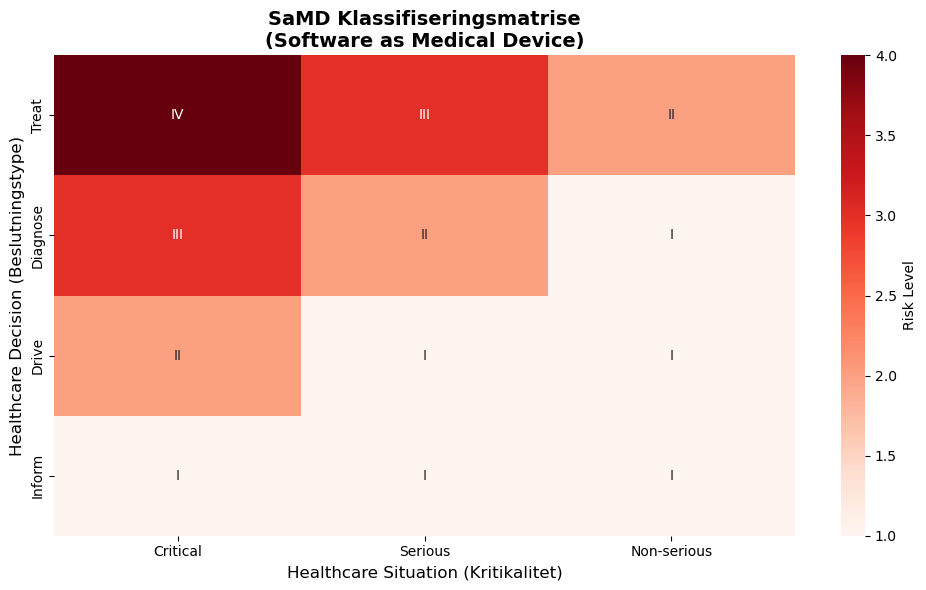


          Critical Serious Non-serious
Treat          IV     III          II
Diagnose      III      II           I
Drive          II       I           I
Inform          I       I           I


In [182]:
# Vis SaMD matrisen
print("📋 SaMD Klassifiseringsmatrise:")
samd_matrix = plot_samd_matrix()
print("\n", samd_matrix)

In [183]:
# Bruk klassifisereren
print("\n" + "="*60)
classifier = SaMDClassifier()
classifier.show_examples()

print("\n" + "="*50)
print("🔍 KLASSIFISERING EKSEMPLER:")
print("="*50)


📚 Healthcare Decision Eksempler:
   • Treat: AI som automatisk justerer medisindoser eller styrer behandlingsutstyr
   • Diagnose: AI som stiller diagnoser eller klassifiserer sykdomstilstander
   • Drive: AI som leverer informasjon for kliniske beslutninger
   • Inform: AI som kun gir informasjon uten å påvirke behandling

🏥 Healthcare Situation Eksempler:
   • Critical: Akutt hjerneslag, Hjertestans, Sepsis, Alvorlig traumer
   • Serious: Kreftdiagnostikk, Hjerte-kar sykdom, Diabetes komplikasjoner, Alvorlig infeksjon
   • Non-serious: Rutine helsesjekk, Forebyggende screening, Livsstilsrådgivning, Wellness overvåkning

🔍 KLASSIFISERING EKSEMPLER:


In [184]:
# Eksempel 1: AI røntgendiagnostikk
print("\n🩻 Eksempel 1: AI for røntgendiagnostikk av lungebetennelse")
classifier.classify_ai_system('Diagnose', 'Serious')


🩻 Eksempel 1: AI for røntgendiagnostikk av lungebetennelse
🤖 AI System Klassifisering:
   Decision Type: Diagnose
   Situation: Serious
   📊 SaMD Klasse: II
   🟡 Lav-middels risiko - Benyttet organ


'II'

In [185]:
# Eksempel 2: AI insulinpumpe
print("\n💉 Eksempel 2: AI-styrt insulinpumpe")
classifier.classify_ai_system('Treat', 'Critical')


💉 Eksempel 2: AI-styrt insulinpumpe
🤖 AI System Klassifisering:
   Decision Type: Treat
   Situation: Critical
   📊 SaMD Klasse: IV
   🔴 Høy risiko - Benyttet organ + ekstra krav


'IV'

In [186]:
# Eksempel 3: Wellness app
print("\n📱 Eksempel 3: Wellness app for treningsovervåkning")
classifier.classify_ai_system('Inform', 'Non-serious'

SyntaxError: incomplete input (1335749270.py, line 3)

In [187]:
# Kliniske evalueringsplaner
print("\n" + "="*60)
print("🏥 KLINISKE EVALUERINGSPLANER - EKSEMPLER")
print("="*60)


🏥 KLINISKE EVALUERINGSPLANER - EKSEMPLER


In [188]:
# Plan for klasse II system
evaluator_2 = ClinicalEvaluationPlanner("AI Røntgendiagnostikk", "II")
plan_2 = evaluator_2.print_evaluation_plan()

print("\n" + "-"*60 + "\n")

📋 KLINISK EVALUERINGSPLAN
🤖 AI System: AI Røntgendiagnostikk
📊 SaMD Klasse: II
⏱️  Estimert tidslinje: 24 måneder
💰 Estimert kostnad: 425,000 NOK

📝 NØDVENDIGE AKTIVITETER:
   1. Litteraturgjennomgang
      ⏱️  Varighet: 2 måneder
      💰 Kostnad: 50,000 NOK

   2. Klinisk studie
      ⏱️  Varighet: 6 måneder
      💰 Kostnad: 200,000 NOK

   3. Performance Testing (Standard)
      ⏱️  Varighet: 3 måneder
      💰 Kostnad: 75,000 NOK

   4. Post-Market Clinical Follow-up
      ⏱️  Varighet: 24 måneder
      💰 Kostnad: 100,000 NOK


------------------------------------------------------------



In [189]:
# Plan for klasse III system  
evaluator_3 = ClinicalEvaluationPlanner("AI Kreftdiagnostikk", "III")
plan_3 = evaluator_3.print_evaluation_plan()

📋 KLINISK EVALUERINGSPLAN
🤖 AI System: AI Kreftdiagnostikk
📊 SaMD Klasse: III
⏱️  Estimert tidslinje: 24 måneder
💰 Estimert kostnad: 800,000 NOK

📝 NØDVENDIGE AKTIVITETER:
   1. Litteraturgjennomgang
      ⏱️  Varighet: 2 måneder
      💰 Kostnad: 50,000 NOK

   2. Klinisk studie
      ⏱️  Varighet: 12 måneder
      💰 Kostnad: 500,000 NOK

   3. Performance Testing (Extensive)
      ⏱️  Varighet: 3 måneder
      💰 Kostnad: 150,000 NOK

   4. Post-Market Clinical Follow-up
      ⏱️  Varighet: 24 måneder
      💰 Kostnad: 100,000 NOK




📊 POST-MARKET SURVEILLANCE - DEMO
📊 POST-MARKET SURVEILLANCE RAPPORT
🤖 AI-system: AI Mammografi Screening
📅 Overvåkingsperiode: 2024-09-13 til 2025-09-13
📈 Gjennomsnittlig nøyaktighet: 0.923
🎯 Siste uke nøyaktighet: 0.890
⚠️ Totalt antall bivirkninger: 85
📊 Gjennomsnittlig bruk per uke: 977
⭐ Gjennomsnittlig brukertilfredshet: 4.39
✅ LAV RISIKO: Systemet fungerer som forventet

📈 Generating performance trends...


/var/folders/1g/_4x26lps6mgg1tr73d7g2bmh0000gp/T/ipykernel_53372/310577075.py:92: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/envs/ai-helse/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


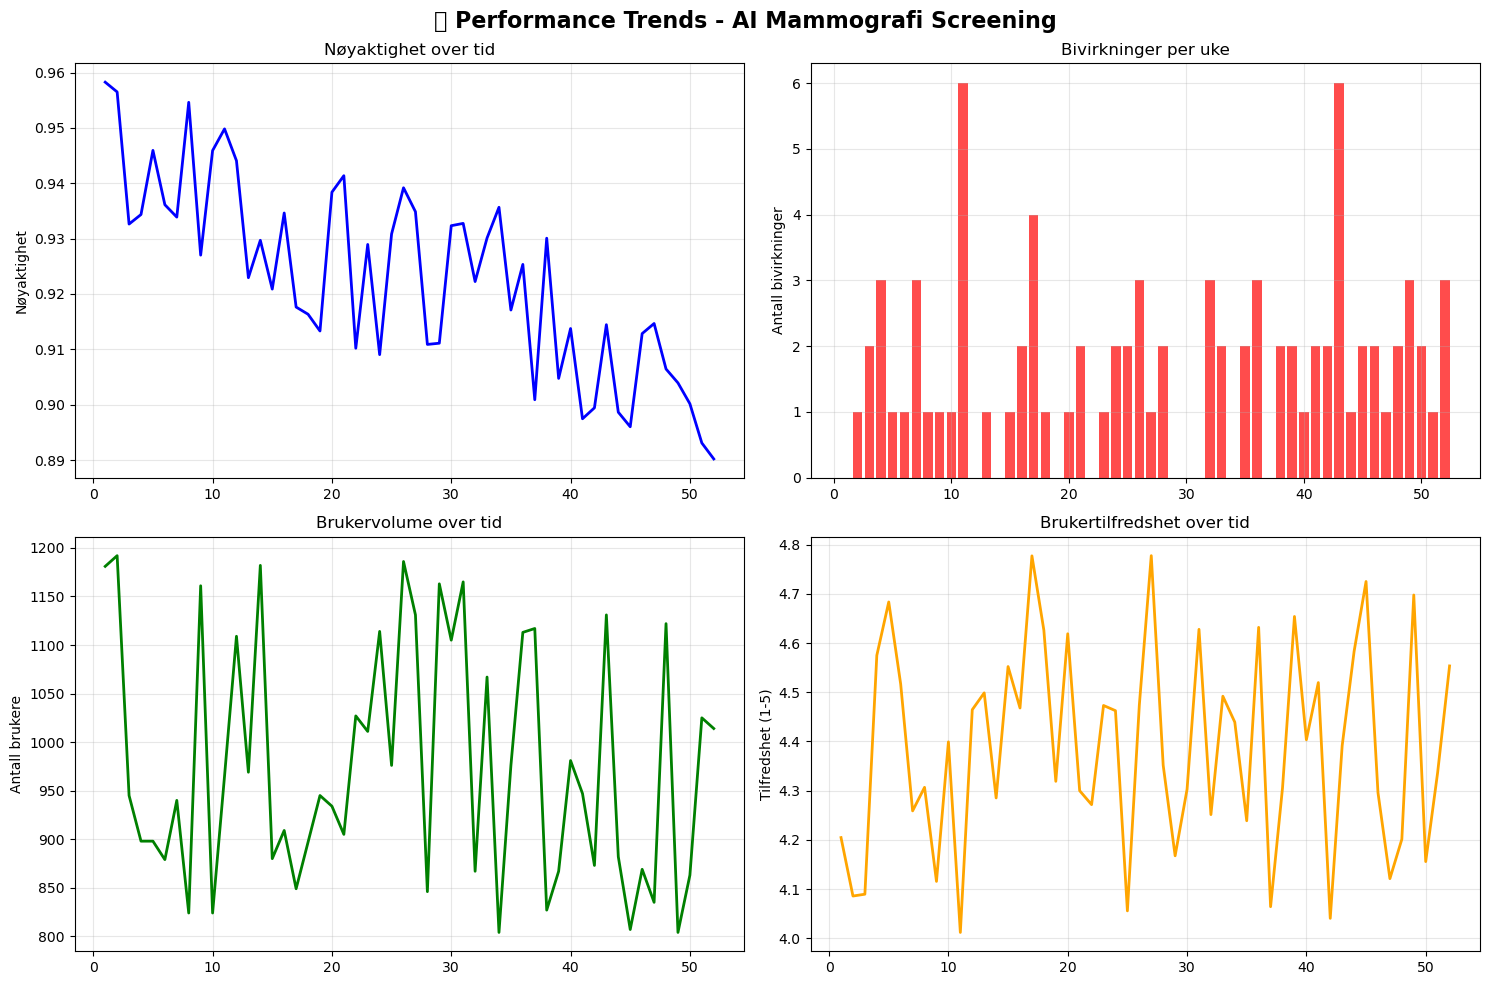

In [190]:
# Post-market surveillance demo
print("\n" + "="*60)
print("📊 POST-MARKET SURVEILLANCE - DEMO")
print("="*60)

surveillance = PostMarketSurveillance("AI Mammografi Screening")
surveillance.print_surveillance_report()
print("\n📈 Generating performance trends...")
surveillance.generate_performance_trends()

## Del 3: KI-forordningen -  AI Act compliance checker

In [191]:
# AI Act compliance checker
class AIActComplianceChecker:
    def __init__(self):
        self.prohibited_practices = [
            'subliminal_techniques',
            'vulnerability_exploitation', 
            'social_scoring',
            'real_time_biometric_public'
        ]
        
        self.high_risk_areas = [
            'medical_devices',
            'critical_infrastructure',
            'education_vocational',
            'employment_recruitment',
            'law_enforcement',
            'migration_asylum',
            'justice_democratic'
        ]
        
        self.compliance_requirements = {
            'prohibited': {
                'allowed': False,
                'requirements': ['System must be discontinued'],
                'penalties': 'Up to €35 million or 7% annual turnover'
            },
            'high_risk': {
                'allowed': True,
                'requirements': [
                    'Risk management system',
                    'Data governance',
                    'Technical documentation',
                    'Record keeping',
                    'Transparency and user information',
                    'Human oversight',
                    'Accuracy and robustness',
                    'Cybersecurity'
                ],
                'penalties': 'Up to €15 million or 3% annual turnover'
            },
            'limited_risk': {
                'allowed': True,
                'requirements': [
                    'Clear disclosure of AI interaction',
                    'Transparency about AI-generated content'
                ],
                'penalties': 'Up to €7.5 million or 1.5% annual turnover'
            },
            'minimal_risk': {
                'allowed': True,
                'requirements': ['Voluntary codes of conduct'],
                'penalties': 'None'
            }
        }
    
    def assess_ai_system(self, system_description, application_area, 
                        user_interaction=False, generates_content=False):
        """Vurderer AI-system mot AI Act krav"""
        assessment = {
            'system': system_description,
            'area': application_area,
            'risk_category': None,
            'compliance_status': None,
            'requirements': [],
            'recommendations': []
        }
        
        # Sjekk forbudte praksiser
        if self._check_prohibited_practices(system_description):
            assessment['risk_category'] = 'prohibited'
            assessment['compliance_status'] = '🚫 NOT COMPLIANT - PROHIBITED'
            
        # Sjekk høyrisiko områder
        elif application_area in self.high_risk_areas:
            assessment['risk_category'] = 'high_risk'
            assessment['compliance_status'] = '🔴 HIGH RISK - STRICT REQUIREMENTS'
            
        # Sjekk begrenset risiko (transparency requirements)
        elif user_interaction or generates_content:
            assessment['risk_category'] = 'limited_risk'
            assessment['compliance_status'] = '🟡 LIMITED RISK - TRANSPARENCY REQUIRED'
            
        # Minimal risiko
        else:
            assessment['risk_category'] = 'minimal_risk'
            assessment['compliance_status'] = '🟢 MINIMAL RISK - VOLUNTARY COMPLIANCE'
        
        # Legg til relevante krav
        category = assessment['risk_category']
        assessment['requirements'] = self.compliance_requirements[category]['requirements']
        assessment['penalties'] = self.compliance_requirements[category]['penalties']
        
        return assessment
    
    def _check_prohibited_practices(self, description):
        """Sjekker om systemet inneholder forbudte praksiser"""
        prohibited_keywords = [
            'subliminal', 'manipulation', 'social scoring', 
            'behavioral modification', 'vulnerability exploitation'
        ]
        
        description_lower = description.lower()
        return any(keyword in description_lower for keyword in prohibited_keywords)
    
    def print_assessment(self, assessment):
        """Skriver ut vurderingsresultatet"""
        print(f"🤖 AI SYSTEM: {assessment['system']}")
        print(f"📍 APPLICATION AREA: {assessment['area']}")
        print(f"📊 RISK CATEGORY: {assessment['risk_category'].upper()}")
        print(f"✅ STATUS: {assessment['compliance_status']}")
        print(f"\n📋 REQUIREMENTS:")
        for req in assessment['requirements']:
            print(f"   • {req}")
        print(f"\n⚖️ POTENTIAL PENALTIES: {assessment['penalties']}")

In [192]:
# Eksempler på bruk
checker = AIActComplianceChecker()

In [193]:
# Test ulike AI-systemer
systems_to_test = [
    {
        'description': 'AI-basert mammografi screening system',
        'area': 'medical_devices',
        'user_interaction': False,
        'generates_content': False
    },
    {
        'description': 'Chatbot for kundeservice',
        'area': 'customer_service',
        'user_interaction': True,
        'generates_content': True
    },
    {
        'description': 'AI for automatisk CV-screening',
        'area': 'employment_recruitment',
        'user_interaction': False,
        'generates_content': False
    }
]

print("🔍 AI ACT COMPLIANCE ASSESSMENTS")
print("="*50)

for i, system in enumerate(systems_to_test, 1):
    print(f"\n📋 VURDERING {i}:")
    print("-" * 30)
    
    assessment = checker.assess_ai_system(
        system['description'],
        system['area'],
        system['user_interaction'],
        system['generates_content']
    )
    
    checker.print_assessment(assessment)
    print()

🔍 AI ACT COMPLIANCE ASSESSMENTS

📋 VURDERING 1:
------------------------------
🤖 AI SYSTEM: AI-basert mammografi screening system
📍 APPLICATION AREA: medical_devices
📊 RISK CATEGORY: HIGH_RISK
✅ STATUS: 🔴 HIGH RISK - STRICT REQUIREMENTS

📋 REQUIREMENTS:
   • Risk management system
   • Data governance
   • Technical documentation
   • Record keeping
   • Transparency and user information
   • Human oversight
   • Accuracy and robustness
   • Cybersecurity

⚖️ POTENTIAL PENALTIES: Up to €15 million or 3% annual turnover


📋 VURDERING 2:
------------------------------
🤖 AI SYSTEM: Chatbot for kundeservice
📍 APPLICATION AREA: customer_service
📊 RISK CATEGORY: LIMITED_RISK
✅ STATUS: 🟡 LIMITED RISK - TRANSPARENCY REQUIRED

📋 REQUIREMENTS:
   • Clear disclosure of AI interaction
   • Transparency about AI-generated content

⚖️ POTENTIAL PENALTIES: Up to €7.5 million or 1.5% annual turnover


📋 VURDERING 3:
------------------------------
🤖 AI SYSTEM: AI for automatisk CV-screening
📍 APPLICATI

In [194]:
# Compliance timeline for high-risk systems
def show_ai_act_timeline():
    """Viser viktige datoer for AI Act implementering"""
    timeline = [
        {'date': '2024-08-01', 'event': 'AI Act trer i kraft'},
        {'date': '2025-02-02', 'event': 'Forbud mot prohibited AI practices'},
        {'date': '2025-08-02', 'event': 'Krav til general-purpose AI models'},
        {'date': '2026-08-02', 'event': 'Full implementering høyrisiko systemer'},
        {'date': '2027-08-02', 'event': 'Alle bestemmelser i full kraft'}
    ]
    
    print("📅 AI ACT IMPLEMENTERING TIMELINE:")
    print("="*40)
    
    for milestone in timeline:
        print(f"📍 {milestone['date']}: {milestone['event']}")

In [195]:
show_ai_act_timeline()

📅 AI ACT IMPLEMENTERING TIMELINE:
📍 2024-08-01: AI Act trer i kraft
📍 2025-02-02: Forbud mot prohibited AI practices
📍 2025-08-02: Krav til general-purpose AI models
📍 2026-08-02: Full implementering høyrisiko systemer
📍 2027-08-02: Alle bestemmelser i full kraft


## Del 4: Praktiske øvelser og case

### 🎯 Øvelse 1: Komplett regulatorisk vurdering

In [196]:
class ComprehensiveRegulatoryAssessment:
    def __init__(self, ai_system_name):
        self.ai_system_name = ai_system_name
        self.assessment_results = {}
    
    def full_assessment(self, system_details):
        """Gjennomfører komplett regulatorisk vurdering"""
        
        print(f"📋 KOMPLETT REGULATORISK VURDERING")
        print(f"{'='*50}")
        print(f"🤖 AI System: {self.ai_system_name}")
        print(f"📄 Beskrivelse: {system_details['description']}")
        print()
        
        # 1. CE-merking vurdering
        print("1️⃣ CE-MERKING VURDERING:")
        print("-" * 25)
        
        ce_assessment = CEMarkingAssessment(self.ai_system_name)
        for criterion, value in system_details['ce_criteria'].items():
            ce_assessment.vurder_kriterium(criterion, value)
        
        ce_result = ce_assessment.trenger_ce_merking()
        print(f"   Resultat: {ce_result}")
        self.assessment_results['ce_marking'] = ce_result
        print()
        
        # 2. SaMD klassifisering
        print("2️⃣ SaMD KLASSIFISERING:")
        print("-" * 22)
        
        classifier = SaMDClassifier()
        samd_class = classifier.classify_ai_system(
            system_details['decision_type'], 
            system_details['situation_type']
        )
        self.assessment_results['samd_class'] = samd_class
        print()
        
        # 3. Klinisk evaluering
        print("3️⃣ KLINISK EVALUERING:")
        print("-" * 21)
        
        evaluator = ClinicalEvaluationPlanner(self.ai_system_name, samd_class)
        evaluation_plan = evaluator.generate_evaluation_plan()
        
        print(f"   ⏱️  Estimert tidslinje: {evaluation_plan['timeline_months']} måneder")
        print(f"   💰 Estimert kostnad: {evaluation_plan['estimated_cost']:,} NOK")
        self.assessment_results['clinical_evaluation'] = evaluation_plan
        print()
        
        # 4. AI Act vurdering
        print("4️⃣ AI ACT VURDERING:")
        print("-" * 18)
        
        ai_act_checker = AIActComplianceChecker()
        ai_act_assessment = ai_act_checker.assess_ai_system(
            system_details['description'],
            system_details['application_area'],
            system_details.get('user_interaction', False),
            system_details.get('generates_content', False)
        )
        
        print(f"   📊 Risikokategori: {ai_act_assessment['risk_category']}")
        print(f"   ✅ Status: {ai_act_assessment['compliance_status']}")
        self.assessment_results['ai_act'] = ai_act_assessment
        print()
        
        # 5. Sammendrag og anbefalinger
        self._generate_summary()
        
        return self.assessment_results
    
    def _generate_summary(self):
        """Genererer sammendrag og anbefalinger"""
        print("5️⃣ SAMMENDRAG OG ANBEFALINGER:")
        print("-" * 32)
        
        # Prioriterte handlinger
        actions = []
        
        if "TRENGER CE-MERKING" in self.assessment_results['ce_marking']:
            actions.append("🔴 Høy prioritet: Påbegynn CE-merkingsprosess")
        
        if self.assessment_results['samd_class'] in ['III', 'IV']:
            actions.append("🔴 Høy prioritet: Omfattende klinisk dokumentasjon kreves")
        
        if self.assessment_results['ai_act']['risk_category'] == 'high_risk':
            actions.append("🟡 Middels prioritet: Implementer AI Act compliance")
        
        print("   📋 PRIORITERTE HANDLINGER:")
        for action in actions:
            print(f"      • {action}")
        
        # Kostnad og tidslinje sammendrag
        total_cost = self.assessment_results['clinical_evaluation']['estimated_cost']
        timeline = self.assessment_results['clinical_evaluation']['timeline_months']
        
        print(f"\n   💰 TOTAL ESTIMERT KOSTNAD: {total_cost:,} NOK")
        print(f"   ⏱️  ESTIMERT TIDSLINJE: {timeline} måneder til markedsklar")

In [197]:
# Test med praktiske case
print("🏥 PRAKTISKE CASE - REGULATORISK VURDERING")
print("="*60)

🏥 PRAKTISKE CASE - REGULATORISK VURDERING


In [198]:
# Case 1: AI-basert EKG analyse
case1_details = {
    'description': 'AI-system for automatisk EKG-analyse og arytmi-deteksjon',
    'ce_criteria': {
        'medisinsk_formål': True,
        'pasient_påvirkning': True,
        'diagnostisk_funksjon': True,
        'behandlings_anbefaling': False,
        'kommersielt_bruk': True
    },
    'decision_type': 'Diagnose',
    'situation_type': 'Critical',
    'application_area': 'medical_devices'
}

assessment1 = ComprehensiveRegulatoryAssessment("AI EKG Analyzer Pro")
results1 = assessment1.full_assessment(case1_details)

print("\n" + "="*60 + "\n")

📋 KOMPLETT REGULATORISK VURDERING
🤖 AI System: AI EKG Analyzer Pro
📄 Beskrivelse: AI-system for automatisk EKG-analyse og arytmi-deteksjon

1️⃣ CE-MERKING VURDERING:
-------------------------
✅ medisinsk_formål: JA
✅ pasient_påvirkning: JA
✅ diagnostisk_funksjon: JA
✅ behandlings_anbefaling: NEI
✅ kommersielt_bruk: JA

🔍 Vurdering av AI EKG Analyzer Pro:
Score: 4/5 kriterier oppfylt
   Resultat: 🚨 TRENGER CE-MERKING

2️⃣ SaMD KLASSIFISERING:
----------------------
🤖 AI System Klassifisering:
   Decision Type: Diagnose
   Situation: Critical
   📊 SaMD Klasse: III
   🟠 Middels-høy risiko - Benyttet organ

3️⃣ KLINISK EVALUERING:
---------------------
   ⏱️  Estimert tidslinje: 24 måneder
   💰 Estimert kostnad: 800,000 NOK

4️⃣ AI ACT VURDERING:
------------------
   📊 Risikokategori: high_risk
   ✅ Status: 🔴 HIGH RISK - STRICT REQUIREMENTS

5️⃣ SAMMENDRAG OG ANBEFALINGER:
--------------------------------
   📋 PRIORITERTE HANDLINGER:
      • 🔴 Høy prioritet: Påbegynn CE-merkingsprosess
  

In [199]:
# Case 2: AI chatbot for mental helse
case2_details = {
    'description': 'AI chatbot som gir mental helse støtte og terapi',
    'ce_criteria': {
        'medisinsk_formål': True,
        'pasient_påvirkning': True,
        'diagnostisk_funksjon': False,
        'behandlings_anbefaling': True,
        'kommersielt_bruk': True
    },
    'decision_type': 'Drive',
    'situation_type': 'Serious',
    'application_area': 'medical_devices',
    'user_interaction': True,
    'generates_content': True
}

assessment2 = ComprehensiveRegulatoryAssessment("MindAI Therapy Bot")
results2 = assessment2.full_assessment(case2_details)

📋 KOMPLETT REGULATORISK VURDERING
🤖 AI System: MindAI Therapy Bot
📄 Beskrivelse: AI chatbot som gir mental helse støtte og terapi

1️⃣ CE-MERKING VURDERING:
-------------------------
✅ medisinsk_formål: JA
✅ pasient_påvirkning: JA
✅ diagnostisk_funksjon: NEI
✅ behandlings_anbefaling: JA
✅ kommersielt_bruk: JA

🔍 Vurdering av MindAI Therapy Bot:
Score: 4/5 kriterier oppfylt
   Resultat: 🚨 TRENGER CE-MERKING

2️⃣ SaMD KLASSIFISERING:
----------------------
🤖 AI System Klassifisering:
   Decision Type: Drive
   Situation: Serious
   📊 SaMD Klasse: I
   🟢 Lav risiko - Egenerklæring

3️⃣ KLINISK EVALUERING:
---------------------
   ⏱️  Estimert tidslinje: 3 måneder
   💰 Estimert kostnad: 75,000 NOK

4️⃣ AI ACT VURDERING:
------------------
   📊 Risikokategori: high_risk
   ✅ Status: 🔴 HIGH RISK - STRICT REQUIREMENTS

5️⃣ SAMMENDRAG OG ANBEFALINGER:
--------------------------------
   📋 PRIORITERTE HANDLINGER:
      • 🔴 Høy prioritet: Påbegynn CE-merkingsprosess
      • 🟡 Middels prioritet: 

### 🎯 Øvelse 2: Compliance gap analyse

In [200]:

def compliance_gap_analysis(current_state, required_state):
    """Analyserer gap mellom nåværende og påkrevd compliance"""
    
    gaps = []
    
    for requirement in required_state:
        if requirement not in current_state:
            gaps.append({
                'requirement': requirement,
                'status': 'Missing',
                'priority': 'High' if 'safety' in requirement.lower() else 'Medium'
            })
        elif current_state[requirement] < 100:  # Ikke fullført
            gaps.append({
                'requirement': requirement,
                'status': f'{current_state[requirement]}% complete',
                'priority': 'Medium'
            })
    
    return gaps

In [201]:
# Eksempel gap analyse
print("\n🔍 COMPLIANCE GAP ANALYSE")
print("="*30)

current_documentation = {
    'Technical documentation': 75,
    'Risk management system': 90,
    'Clinical evaluation': 50,
    'Quality management': 80,
    'Post-market surveillance': 30
}

required_documentation = [
    'Technical documentation',
    'Risk management system', 
    'Clinical evaluation',
    'Quality management',
    'Post-market surveillance',
    'Cybersecurity measures',
    'Data governance'
]

gaps = compliance_gap_analysis(current_documentation, required_documentation)

print("📋 Identifiserte gap:")
for gap in gaps:
    priority_emoji = "🔴" if gap['priority'] == 'High' else "🟡"
    print(f"   {priority_emoji} {gap['requirement']}: {gap['status']}")


🔍 COMPLIANCE GAP ANALYSE
📋 Identifiserte gap:
   🟡 Technical documentation: 75% complete
   🟡 Risk management system: 90% complete
   🟡 Clinical evaluation: 50% complete
   🟡 Quality management: 80% complete
   🟡 Post-market surveillance: 30% complete
   🟡 Cybersecurity measures: Missing
   🟡 Data governance: Missing


### 🎯 Øvelse 3: Regulatory roadmap

In [202]:
def create_regulatory_roadmap(samd_class, target_market_date):
    """Lager regulatorisk roadmap basert på SaMD klasse"""
    
    from datetime import datetime, timedelta
    
    # Definer activities basert på klasse
    activities = {
        'I': [
            {'task': 'Technical documentation', 'duration_weeks': 4, 'cost': 50000},
            {'task': 'Risk analysis', 'duration_weeks': 3, 'cost': 30000},
            {'task': 'Self-declaration', 'duration_weeks': 1, 'cost': 5000}
        ],
        'II': [
            {'task': 'Technical documentation', 'duration_weeks': 8, 'cost': 100000},
            {'task': 'Risk analysis', 'duration_weeks': 6, 'cost': 75000},
            {'task': 'Clinical evaluation', 'duration_weeks': 16, 'cost': 200000},
            {'task': 'Quality system', 'duration_weeks': 8, 'cost': 80000},
            {'task': 'Notified body assessment', 'duration_weeks': 12, 'cost': 150000}
        ],
        'III': [
            {'task': 'Comprehensive technical documentation', 'duration_weeks': 12, 'cost': 200000},
            {'task': 'Extensive risk analysis', 'duration_weeks': 8, 'cost': 120000},
            {'task': 'Clinical trials', 'duration_weeks': 32, 'cost': 500000},
            {'task': 'Quality system certification', 'duration_weeks': 12, 'cost': 150000},
            {'task': 'Notified body assessment', 'duration_weeks': 16, 'cost': 250000}
        ]
    }
    
    plan = activities.get(samd_class, activities['II'])
    
    # Beregn total tid og kostnad
    total_weeks = sum(activity['duration_weeks'] for activity in plan)
    total_cost = sum(activity['cost'] for activity in plan)
    
    # Lag timeline
    start_date = datetime.strptime(target_market_date, '%Y-%m-%d') - timedelta(weeks=total_weeks)
    
    print(f"📅 REGULATORY ROADMAP - SaMD Klasse {samd_class}")
    print("="*45)
    print(f"🎯 Target market date: {target_market_date}")
    print(f"🚀 Required start date: {start_date.strftime('%Y-%m-%d')}")
    print(f"⏱️  Total duration: {total_weeks} uker")
    print(f"💰 Total estimated cost: {total_cost:,} NOK")
    print()
    
    print("📋 AKTIVITETER:")
    current_date = start_date
    for i, activity in enumerate(plan, 1):
        end_date = current_date + timedelta(weeks=activity['duration_weeks'])
        print(f"   {i}. {activity['task']}")
        print(f"      📅 {current_date.strftime('%Y-%m-%d')} - {end_date.strftime('%Y-%m-%d')}")
        print(f"      💰 {activity['cost']:,} NOK")
        print()
        current_date = end_date
    
    return {
        'start_date': start_date,
        'total_weeks': total_weeks,
        'total_cost': total_cost,
        'activities': plan
    }

In [203]:
# Test regulatory roadmap
print("\n🗺️ REGULATORY ROADMAP EXAMPLES")
print("="*40)

roadmap_2 = create_regulatory_roadmap('II', '2026-06-01')
print("\n" + "-"*50 + "\n")
roadmap_3 = create_regulatory_roadmap('III', '2026-12-01')


🗺️ REGULATORY ROADMAP EXAMPLES
📅 REGULATORY ROADMAP - SaMD Klasse II
🎯 Target market date: 2026-06-01
🚀 Required start date: 2025-06-16
⏱️  Total duration: 50 uker
💰 Total estimated cost: 605,000 NOK

📋 AKTIVITETER:
   1. Technical documentation
      📅 2025-06-16 - 2025-08-11
      💰 100,000 NOK

   2. Risk analysis
      📅 2025-08-11 - 2025-09-22
      💰 75,000 NOK

   3. Clinical evaluation
      📅 2025-09-22 - 2026-01-12
      💰 200,000 NOK

   4. Quality system
      📅 2026-01-12 - 2026-03-09
      💰 80,000 NOK

   5. Notified body assessment
      📅 2026-03-09 - 2026-06-01
      💰 150,000 NOK


--------------------------------------------------

📅 REGULATORY ROADMAP - SaMD Klasse III
🎯 Target market date: 2026-12-01
🚀 Required start date: 2025-05-20
⏱️  Total duration: 80 uker
💰 Total estimated cost: 1,220,000 NOK

📋 AKTIVITETER:
   1. Comprehensive technical documentation
      📅 2025-05-20 - 2025-08-12
      💰 200,000 NOK

   2. Extensive risk analysis
      📅 2025-08-12 - 202

### 📚 Oppsummering og nøkkelpoenger

In [204]:
print("\n📚 NØKKELPOENGER - OPPSUMMERING")
print("="*40)

key_points = [
    "CE-merking kreves for AI som medisinsk utstyr",
    "SaMD klassifisering bestemmer regulatoriske krav", 
    "Klinisk evaluering er obligatorisk for klasse II+",
    "AI Act legger til ekstra krav for høyrisiko AI",
    "Post-market surveillance er kritisk for AI-systemer",
    "Dokumentasjon må dekke AI-spesifikke aspekter",
    "Kostnader og tidslinje varierer betydelig med klasse"
]

for i, point in enumerate(key_points, 1):
    print(f"{i}. ✅ {point}")

print(f"\n🎓 Gratulerer! Du har fullført gjennomgangen av")
print(f"   regulatoriske krav for AI i helse. 🏥🤖")


📚 NØKKELPOENGER - OPPSUMMERING
1. ✅ CE-merking kreves for AI som medisinsk utstyr
2. ✅ SaMD klassifisering bestemmer regulatoriske krav
3. ✅ Klinisk evaluering er obligatorisk for klasse II+
4. ✅ AI Act legger til ekstra krav for høyrisiko AI
5. ✅ Post-market surveillance er kritisk for AI-systemer
6. ✅ Dokumentasjon må dekke AI-spesifikke aspekter
7. ✅ Kostnader og tidslinje varierer betydelig med klasse

🎓 Gratulerer! Du har fullført gjennomgangen av
   regulatoriske krav for AI i helse. 🏥🤖


### 📋 Sjekkliste for videre arbeid

In [205]:
print(f"\n📋 SJEKKLISTE FOR VIDERE ARBEID:")
print("-" * 35)

checklist = [
    "Identifiser SaMD klasse for ditt AI-system",
    "Vurder CE-merking behov",
    "Planlegg klinisk evaluering",
    "Sjekk AI Act compliance",
    "Etabler quality management system", 
    "Planlegg post-market surveillance",
    "Budsjetter tid og ressurser",
    "Identifiser relevant Notified Body"
]

for item in checklist:
    print(f"   ☐ {item}")

print(f"\n💡 For spørsmål om spesifikke case, bruk verktøyene")
print(f"   i denne notebooken til å vurdere ditt AI-system!")


📋 SJEKKLISTE FOR VIDERE ARBEID:
-----------------------------------
   ☐ Identifiser SaMD klasse for ditt AI-system
   ☐ Vurder CE-merking behov
   ☐ Planlegg klinisk evaluering
   ☐ Sjekk AI Act compliance
   ☐ Etabler quality management system
   ☐ Planlegg post-market surveillance
   ☐ Budsjetter tid og ressurser
   ☐ Identifiser relevant Notified Body

💡 For spørsmål om spesifikke case, bruk verktøyene
   i denne notebooken til å vurdere ditt AI-system!
